# Loan Approval Prediction:

#### About Company
Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

#### Problem
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

#### Source
https://www.kaggle.com/code/ajaymanwani/loan-approval-prediction/notebook


In [2]:
%pwd

'/Users/Cesar-mac/Desktop/Projeto_analise_credito/main/notebooks'

In [2]:
#main tools
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib

#import itertools
from scipy import stats

# Statistic tools
from scipy.stats import mannwhitneyu, normaltest
from scipy.stats import chisquare

from pylab import *

In [30]:
df = pd.read_csv('../datasets/raw/train_u6lujuX_CVtuZ9i.csv')
df=df.dropna(axis=0)
df['Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

df['Dependents_cost'] = df['Dependents']
df['Dependents_cost'] = df['Dependents_cost'].replace(['0', '1', '2', '3+'], [0, 700, 1200, 1600])

df['Income_after_payment'] = df['Income'] - df['LoanAmount']/df['Loan_Amount_Term'] - df['Dependents_cost']
df['First_Income_after_payment'] = df['ApplicantIncome'] - df['LoanAmount']/df['Loan_Amount_Term'] - df['Dependents_cost']


selecao = (df['Loan_Status'] == 'Y')
df_aproved = df[selecao]

selecao = (df['Loan_Status'] == 'N')
df_reproved = df[selecao]

#Dataframe for only subjects without credit history
selecao = (df_aproved['Credit_History'] == 0)
loan_aproved_no_history = df_aproved[selecao]
loan_aproved_with_history = df_aproved[~selecao]

#Dataframe for only subjects with credit history
selecao = (df_reproved['Credit_History'] == 1)
loan_reproved_with_history = df_reproved[selecao]
loan_reproved_no_history = df_reproved[~selecao]

df.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income,Dependents_cost,Income_after_payment,First_Income_after_payment
55,LP001194,Male,Yes,2,Graduate,No,2708,1167.0,97.0,360.0,1.0,Semiurban,Y,3875.0,1200,2674.730556,1507.730556
172,LP001586,Male,Yes,3+,Not Graduate,No,3522,0.0,81.0,180.0,1.0,Rural,N,3522.0,1600,1921.550000,1921.550000
229,LP001761,Male,No,0,Graduate,Yes,6400,0.0,200.0,360.0,1.0,Rural,Y,6400.0,0,6399.444444,6399.444444
415,LP002337,Female,No,0,Graduate,No,2995,0.0,60.0,360.0,1.0,Urban,Y,2995.0,0,2994.833333,2994.833333
106,LP001369,Male,Yes,2,Graduate,No,11417,1126.0,225.0,360.0,1.0,Urban,Y,12543.0,1200,11342.375000,10216.375000


In [88]:
df.Education.unique()

array(['Graduate', 'Not Graduate'], dtype=object)

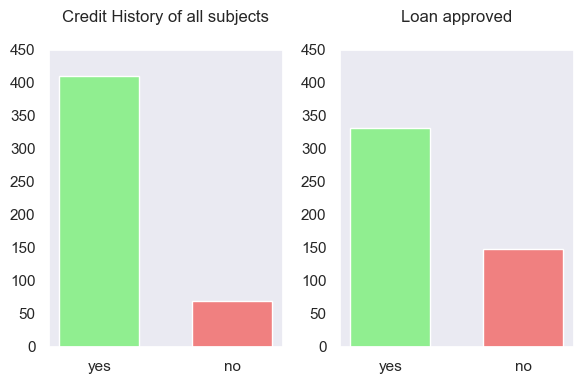

In [89]:
# Credit history aproved vs non aproved
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 4), layout='tight')

df1 = df[['Loan_Status','Credit_History']].copy()
df1['Credit_History'] = df1['Credit_History'].replace([0, 1], ['no', 'yes'])
df1['Loan_Status'] = df1['Loan_Status'].replace(['N', 'Y'], ['no', 'yes'])

ax61 = df1.Credit_History.value_counts(sort=True).index
# ax61 = list([str(ax61[0]),str(ax61[1])])
ax62 = df1.Credit_History.value_counts(sort=True)
ax1.bar(ax61,ax62,color=['lightgreen', 'lightcoral'],width=0.6)
ax1.set_title('Credit History of all subjects', pad=20)
ax1.set_ylim([0, 450])
ax1.grid()


ax61 = df1.Loan_Status.value_counts(sort=True).index
# ax61 = list([str(ax61[0]),str(ax61[1])])
ax62 = df1.Loan_Status.value_counts(sort=True)
ax2.bar(ax61,ax62,color=['lightgreen', 'lightcoral'],width=0.6)
ax2.set_title('Loan approved', pad=20)
ax2.set_ylim([0, 450])
ax2.grid()

# sujeitos aprovados vs sujeitos reprovados por credit history

Through the graphs above we can observe the proportion of subjects who have credit history and the proportion of subjects who had the loan approved. We can also observe that we have proportionally more subjects with credit history than with approved loans.

---

### Confusion Matrix for Loan Status and Credit History

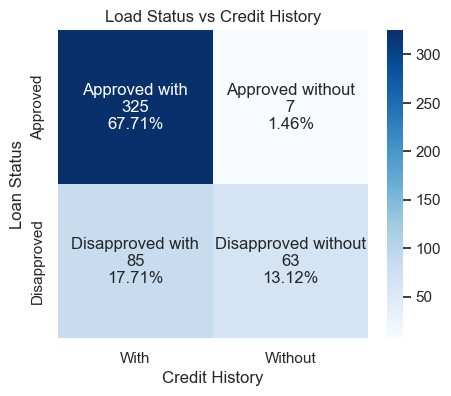

In [90]:
from sklearn.metrics import confusion_matrix

# Preparing the data
df2 = df[['Loan_Status','Credit_History']].copy()
df2['Credit_History'] = df2['Credit_History'].replace([0, 1], [1, 0])
df2['Loan_Status'] = df2['Loan_Status'].replace(['N', 'Y'], [1, 0])

# Creating the confusion matrix
cm = confusion_matrix(df2.Loan_Status, df2.Credit_History)

# Plotting the confusion Matrix
group_names = ['Approved with','Approved without','Disapproved with','Disapproved without']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (5,4))
ax= plt.subplot()
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues',ax=ax)

ax.set_xlabel('Credit History');ax.set_ylabel('Loan Status'); 
ax.set_title('Load Status vs Credit History'); 
ax.xaxis.set_ticklabels(['With', 'Without']); ax.yaxis.set_ticklabels(['Approved', 'Disapproved']);

Through the above confusion matrix we can observe the distribution of subjects in relation to loan approval and credit history for the test data. Most test subjects have a credit history and have been approved for a loan (67.71%). Only 1.46% of the subjects were approved without having a credit history.

---

### Statistical tests checking for variable distributions

Comparations for variable Married, Education and Credit History

In [91]:
from scipy.stats import chisquare

significancia = 0.05
confianca = 1 - significancia
k = 2 # Número de eventos possíveis
graus_de_liberdade = k - 1


# Married
Qnt = df.Married.value_counts(sort=False)
Apro = df_aproved.Married.value_counts(sort=False)
Percentage_of_approved = (Apro[0]+Apro[1])/(Qnt[0]+Qnt[1])

AproM = Qnt*Percentage_of_approved

F_Observada1 = [Apro[0], Apro[1]]
F_Esperada1 = [AproM[0], AproM[1]]

chi_2, p_valor1 = chisquare(f_obs=F_Observada1, f_exp=F_Esperada1)
print(f'The p-valor for Married is {p_valor1}')
print(f'Is the p-value within significance for the Married variable? {p_valor1 <= significancia}, The significance tests result doenst indicate the there is a different in quantity of married and not married subjects')



# Education
Qnt = df.Education.value_counts(sort=False)
Apro = df_aproved.Education.value_counts(sort=False)
Percentage_of_approved = (Apro[0]+Apro[1])/(Qnt[0]+Qnt[1])

AproM = Qnt*Percentage_of_approved

F_Observada2 = [Apro[0], Apro[1]]
F_Esperada2 = [AproM[0], AproM[1]]

chi_2, p_valor2 = chisquare(f_obs=F_Observada2, f_exp=F_Esperada2)
print(f'\nThe p-valor for Education is {p_valor2}')
print(f'Is the p-value within significance for the Education variable? {p_valor2 <= significancia} The significance tests result doenst indicate the there is a different in quantity of graduated and ungraduated subjects')



# Credit History
Qnt = df.Credit_History.value_counts(sort=False)
Apro = df_aproved.Credit_History.value_counts(sort=False)
Percentage_of_approved = (Apro[0]+Apro[1])/(Qnt[0]+Qnt[1])

AproM = Qnt*Percentage_of_approved

F_Observada3 = [Apro[0], Apro[1]]
F_Esperada3 = [AproM[0], AproM[1]]

chi_3, p_valor3 = chisquare(f_obs=F_Observada3, f_exp=F_Esperada3)
print(f'\nThe p-valor for Credit history is {p_valor3}')

print(f'Is the p-value within significance for the Credit History variable? {p_valor3 <= significancia} The significance tests result indicates there is a different in quantity of subjects with and without credity history')

The p-valor for Married is 0.17180010259793332
Is the p-value within significance for the Married variable? False, The significance tests result doenst indicate the there is a different in quantity of married and not married subjects

The p-valor for Education is 0.4050847810478475
Is the p-value within significance for the Education variable? False The significance tests result doenst indicate the there is a different in quantity of graduated and ungraduated subjects

The p-valor for Credit history is 1.1923418238375867e-10
Is the p-value within significance for the Credit History variable? True The significance tests result indicates there is a different in quantity of subjects with and without credity history


---

### Comparison between what is left over every month after loan payment between subjects with approved and denied loans

(-2000.0, 30000.0)

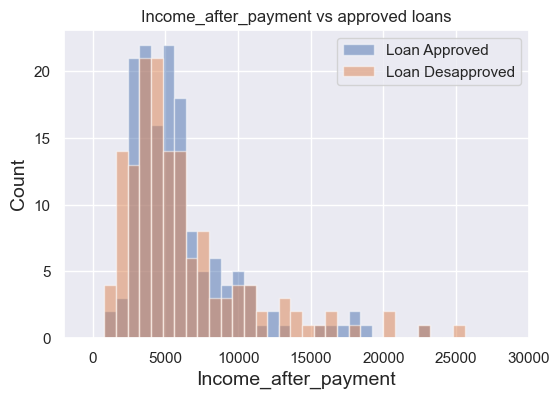

In [92]:
plt.figure(figsize=(6,4))

# Organizing the data
plt.hist(df_aproved.sample(df_reproved.shape[0]).Income_after_payment, bins=np.arange(0, 30000 + 800, 800), alpha=0.5, label="Loan Approved")
plt.hist(df_reproved.Income_after_payment, bins=np.arange(0, 30000 + 800, 800), alpha=0.5, label="Loan Desapproved")


plt.xlabel("Income_after_payment", size=14)
plt.ylabel("Count", size=14)
plt.title("Income_after_payment vs approved loans")
plt.legend(loc='upper right')
plt.xlim([-2000, 30000])

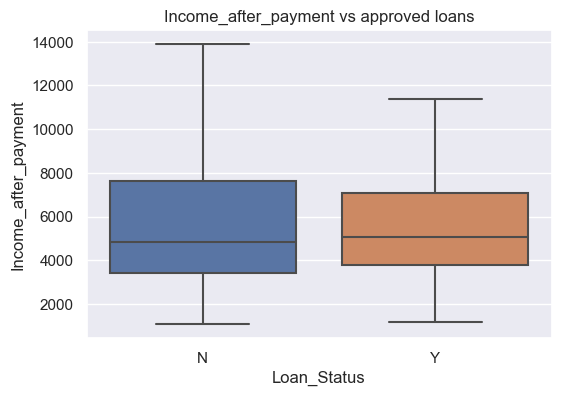

In [93]:
sns.boxplot(data=df, 
            y="Income_after_payment", x="Loan_Status", sym='').set(
    title='Income_after_payment vs approved loans')
sns.set(rc={'figure.figsize':(6,4)})

In [35]:
df_aproved1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income,Dependents_cost,Income_after_payment,First_Income_after_payment
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,0,2999.816667,2999.816667
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,0,4940.666667,2582.666667
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,0,5999.608333,5999.608333
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,9613.0,1200,8412.258333,4216.258333
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,3849.0,0,3848.736111,2332.736111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y,5182.0,0,5181.700000,3231.700000
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0,0,2899.802778,2899.802778
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0,1600,2505.777778,2505.777778
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0,700,7611.297222,7371.297222


In [39]:
#df_aproved.Income_after_payment.describe().info()
#df_reproved.Income_after_payment.describe()]
df_aproved1 = df_aproved.copy()
df_reproved1 = df_reproved.copy()

df_aproved1.rename(columns={'Income_after_payment': 'Loan Approved'}, inplace=True)
df_reproved1.rename(columns={'Income_after_payment': 'Loan Disapproved'}, inplace=True)


print(pd.merge(df_aproved1['Loan Approved'].describe(), df_reproved1['Loan Disapproved'].describe(), left_index=True, right_index=True, suffixes=('', '2')))

       Loan Approved  Loan Disapproved
count     332.000000        148.000000
mean     6216.643550       7067.633872
std      4649.077718       8080.101668
min      1184.858333       1080.686111
25%      3768.451389       3411.654861
50%      5067.111111       4845.152778
75%      7083.170833       7614.547778
max     43896.666667      79399.000000


Through the comparisons made in the histogram and in the boxplot, we observed that subjects with an approved loan have an income after payment of the debt with an approximate average of U$ 6000 and with a standard deviation smaller than the subjects with a denied loan.

---


#### Comparison of Loan_Status, Credit_History and Income_after_payment

In [ ]:
df3 = df[['Loan_Status','Credit_History','Income_after_payment', 'LoanAmount']].copy()
df3['Credit_History'] = df3['Credit_History'].replace([0, 1], ['no', 'yes'])
df3['Loan_Status'] = df3['Loan_Status'].replace(['N', 'Y'], ['no', 'yes'])

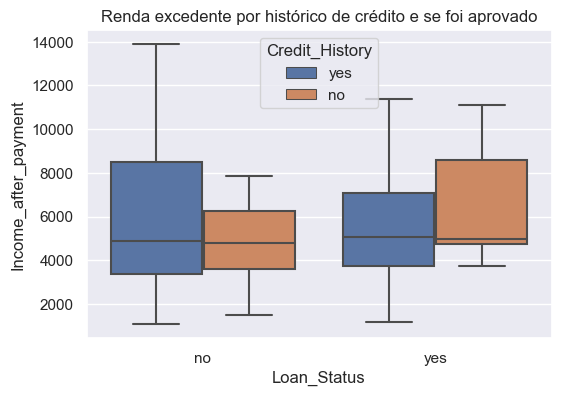

In [ ]:
sns.boxplot(data=df3, 
            y="Income_after_payment", x="Loan_Status",hue='Credit_History', sym='').set(
    title='Renda excedente por histórico de crédito e se foi aprovado')
sns.set(rc={'figure.figsize':(6,4)})

We were able to observe that the distribution among those who had the loan approved without having a credit history, have an income after the payment above 4000. While approximately half of those who were denied a loan and do not have a credit history have an income equal to or below 5000

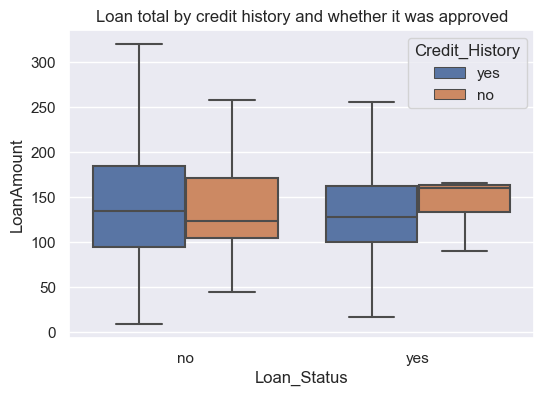

In [ ]:
sns.boxplot(data=df3, y="LoanAmount", 
            x="Loan_Status",hue='Credit_History', sym='').set(
    title='Loan total by credit history and whether it was approved')
sns.set(rc={'figure.figsize':(6,4)})

We were able to observe that the distribution among those who had the loan approved without having a credit history, has a loan amount of less than 170,000.

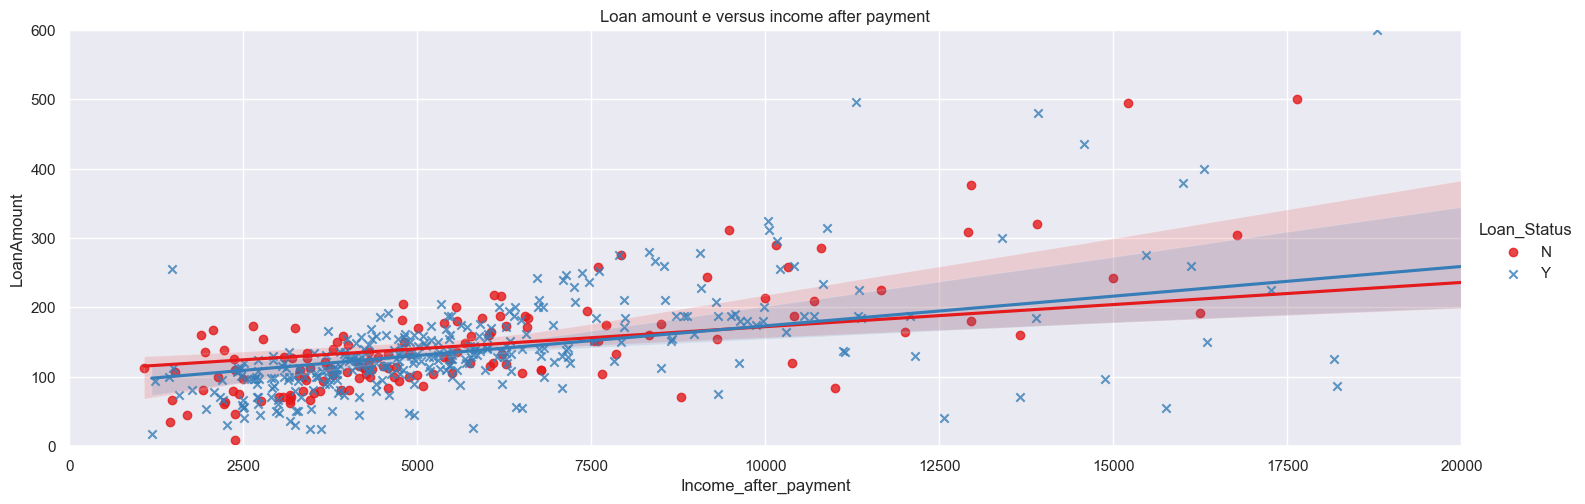

In [ ]:
g = sns.lmplot(x="Income_after_payment", y="LoanAmount", hue="Loan_Status", data=df,
           markers=["o", "x"], palette="Set1",height=5, aspect=3)
g.set(xlim=(0, 20000))
g.set(ylim=(0, 600))
g.set(title='Loan amount e versus income after payment')

In the graph above, we can practically not see any difference in the relationship between Loan approved and disapproved status when comparing the scatter plot using Loan amount and Income after payment.

### Treinando o modelo

In [5]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, max_error

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

from sklearn.svm import SVR, SVC
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import KFold

from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_auc_score


In [75]:
df5 = df.copy()
#df4['Credit_History'] = df4['Credit_History'].replace([0, 1], ['no', 'yes'])
df5['Loan_Status'] = df5['Loan_Status'].replace(['N', 'Y'], [0, 1])
df5['Dependents'] = df5['Dependents'].replace(['3+'], [3])
df5['Education'] = df5['Education'].replace(['Graduate', 'Not Graduate'], [1,0])

df5['Gender'] = df5['Gender'].replace(['Male', 'Female'], [1,0])
df5['Married'] = df5['Married'].replace(['Yes', 'No'], [1,0])
df5['Self_Employed'] = df5['Self_Employed'].replace(['Yes', 'No'], [1,0])
df5['Property_Area'] = df5['Property_Area'].replace(['Rural', 'Semiurban','Urban'], [2,1,0])


features = df5.drop(columns=['Loan_Status','Loan_ID'])
target = df5.Loan_Status

features = features.apply(pd.to_numeric)
target = target.apply(pd.to_numeric)

train_x, test_x, train_y, test_y = train_test_split(features, target, test_size=0.4)

In [21]:
train_x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Income,Dependents_cost,Income_after_payment,First_Income_after_payment
388,1,1,0,1,0,2333,2417.0,136.0,360.0,1.0,0,4750.0,0,4749.622222,2332.622222
480,0,0,0,0,0,4350,0.0,154.0,360.0,1.0,2,4350.0,0,4349.572222,4349.572222
572,1,1,2,1,0,16666,0.0,275.0,360.0,1.0,0,16666.0,1200,15465.236111,15465.236111
163,1,1,2,1,0,4167,1447.0,158.0,360.0,1.0,2,5614.0,1200,4413.561111,2966.561111
70,1,1,0,1,0,3208,3066.0,172.0,360.0,1.0,0,6274.0,0,6273.522222,3207.522222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,1,1,2,1,0,3100,1400.0,113.0,360.0,1.0,0,4500.0,1200,3299.686111,1899.686111
168,1,0,0,1,0,2237,0.0,63.0,480.0,0.0,1,2237.0,0,2236.868750,2236.868750
58,1,1,1,1,0,8080,2250.0,180.0,360.0,1.0,0,10330.0,700,9629.500000,7379.500000
258,1,1,0,1,0,14683,2100.0,304.0,360.0,1.0,2,16783.0,0,16782.155556,14682.155556


In [76]:
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K Neighbors": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC()
}

#define como transforma cada coluna para poder rodar no modelo de ML
numeric_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term','Income', 'Dependents_cost', 'Income_after_payment',
       'First_Income_after_payment']
numeric_transformer = SimpleImputer(strategy="median")

#Exemplo de transformar a coluna não numerica com ordem para intervalo valores.
ordinal_features = ['Dependents','Education'] #não acho que é ordinal
ordinal_transformer = OrdinalEncoder()

#Exemplo de transformar uma coluna sem ordem para numerica.
categorical_features = ['Gender', 'Married','Self_Employed','Property_Area']
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

#Cria o pipeline de transformações de coluna com as informações a cima
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("le", ordinal_transformer, ordinal_features),
        ("ohe", categorical_transformer, categorical_features)
    ]
)

#listas vazias
scores = list()
pred_y_list = list()

#para cada modelo normaliza, treina e testa com cada métrica adicionando à lista
for model_name, model_obj in models.items():
    model = Pipeline([
        ("preprocessor", preprocessor), 
        ('scaler', StandardScaler()), #normalização
        ("PCA", PCA(n_components=.95)), #PCA
        ('clf', model_obj) #modelo de ML
    ])
    model.fit(train_x, train_y) #treino
    pred_y = model.predict(test_x) #previsão
    pred_y_list.append(pred_y)
    
    # Testes:
    scores.append({
        "model": model_name,
        "accuracy_score": accuracy_score(test_y, pred_y), 
        "precision_score": precision_score(test_y, pred_y), 
        "recall_score": recall_score(test_y, pred_y), 
        "f1_score": f1_score(test_y, pred_y), 
        "roc_auc": roc_auc_score(test_y, pred_y),
    })

pd.DataFrame(scores)

,model,accuracy_score,precision_score,recall_score,f1_score,roc_auc
0,Decision Tree,0.552083,0.692308,0.661765,0.676692,0.473739
1,Random Forest,0.640625,0.713376,0.823529,0.764505,0.509979
2,K Neighbors,0.635417,0.706250,0.830882,0.763514,0.495798
3,Logistic Regression,0.671875,0.708571,0.911765,0.797428,0.500525
4,SVM,0.687500,0.702128,0.970588,0.814815,0.485294


Comparar com Acertos do LoanStatus/Credity_History

In [83]:
from sklearn.metrics import confusion_matrix

In [77]:
pred_y = pred_y_list[4]

pred_y[pred_y == 0] = 2
pred_y[pred_y == 1] = 0
pred_y[pred_y == 2] = 1

test_y[test_y == 0] = 2
test_y[test_y == 1] = 0
test_y[test_y == 2] = 1

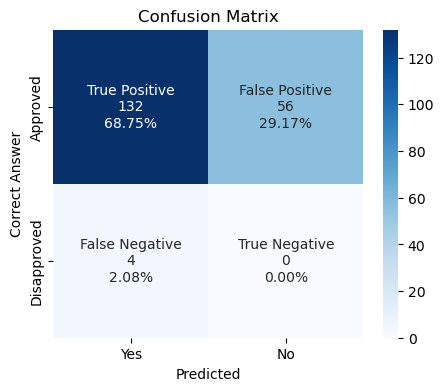

In [82]:
cm = confusion_matrix(pred_y, test_y)

# Plotting the confusion Matrix
group_names = ['True Positive','False Positive','False Negative','True Negative']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (5,4))
ax= plt.subplot()
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues',ax=ax)

ax.set_xlabel('Predicted');ax.set_ylabel('Correct Answer'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Yes', 'No']); ax.yaxis.set_ticklabels(['Approved', 'Disapproved']);

The New model was able to increase the score of True Positive, but increased the score of False Positive as well.

In [85]:
import pickle

Pkl_Filename = "model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(models['SVM'], file)